In [64]:
import json
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

# Split large data

In [ ]:
# input_file = 'VoxGov.jsonl'
# output_prefix = 'VoxGov_sp'
# lines_per_file = 15000  # Adjust this number as needed

# file_number = 1
# line_count = 0
# current_file = None

# def is_valid_json(line):
#     try:
#         json.loads(line)
#         return True
#     except json.JSONDecodeError:
#         return False

# with open(input_file, 'r') as infile:
#     for line in infile:
#         if line_count % lines_per_file == 0:
#             if current_file:
#                 current_file.close()
#             output_file = f"{output_prefix}_{file_number}.jsonl"
#             current_file = open(output_file, 'w')
#             file_number += 1
        
#         if is_valid_json(line.strip()):
#             current_file.write(line)
#             line_count += 1
#         else:
#             print(f"Skipping invalid JSON line: {line.strip()}")

#     if current_file:
#         current_file.close()

#     print(f"Split complete. Created {file_number - 1} files.")

In [14]:
source = set()
sourceType = set()
organizations = set()
places = set()


with open('VoxGov.jsonl', 'r') as file:
    for i, line in enumerate(file, start=1):
        # print(line.strip())
        data = json.loads(line.strip())
        if 'source' in data.keys():
            source.add(data['source'])
        # if 'sourceType' in data.keys():
        #     sourceType.add(data['sourceType'])
        # if 'organizations' in data.keys():
        #     organizations = organizations.union(set(data['organizations']))
        # if 'places' in data.keys():
        #     places = places.union(set(data['places']))

In [15]:
print(len(source))
# print(len(sourceType))
# print(len(organizations))
# print(len(places))

2137


In [21]:
[x for x in source if x.startswith('Senate')]

['Senate Cmte. on Energy and Natural Resources',
 "Senate Cmte. on Veterans' Affairs",
 'Senate Cmte. on Appropriations',
 'Senate Committee on Agriculture, Nutrition, and Forestry',
 'Senate Cmte. on the Budget',
 'Senate Cmte. on Armed Services',
 'Senate Cmte. on Health, Education, Labor and Pensions',
 'Senate Cmte. on Commerce, Science, and Transportation',
 'Senate Caucus on International Narcotics Control',
 'Senate Cmte. on the Judiciary',
 'Senate Cmte. on Agriculture, Nutrition & Forestry',
 'Senate Cmte. on Indian Affairs',
 'Senate Cmte. on Foreign Relations',
 'Senate Cmte. on Environment and Public Works',
 'Senate Democratic Policy and Communications Cmte. (DPCC)',
 'Senate Republican Leader - Mitch McConnell - (R - KY)',
 'Senate Cmte. on Small Business and Entrepreneurship',
 'Senate Cmte. on Banking, Housing, and Urban Affairs',
 'Senate Republican Policy Cmte. (RPC)',
 'Senate Cmte. on Homeland Security & Governmental Affairs',
 'Senate Cmte. on Finance',
 'Senate De

In [35]:
VoxGov_post = []

with open('VoxGov.jsonl', 'r') as file:
    for i, line in enumerate(file, start=1):
        data = json.loads(line.strip())

        try:
            source = data['source'].lower()

            if source.startswith('rep'):
                source_category = 'rep'
                VoxGov_post.append([data['id'], source_category, data['source'], data['sourceType'], data['title'], data['text'], data['url'], data['date'], 
                                data['organizations'], data['places']])
                
            elif source.startswith('senate'):
                source_category = 'sen'
                VoxGov_post.append([data['id'], source_category, data['source'], data['sourceType'], data['title'], data['text'], data['url'], data['date'], 
                                data['organizations'], data['places']])
            else:
                pass

        except:
            continue

print(len(VoxGov_post))

4484


In [37]:
VoxGov_post = pd.DataFrame(VoxGov_post, columns=['id', 'source_category', 'source', 'sourceType', 'title', 'text', 'url', 'date', 'organizations', 'places'])
post_ids = VoxGov_post['id'].tolist()

In [ ]:
set(VoxGov_post['source'])

{'Rep. Aderholt, Robert B. - (R - AL)',
 'Rep. Aguilar, Pete - (D - CA)',
 'Rep. Allen, Rick W. - (R - GA)',
 'Rep. Allred, Colin Z. - (D - TX)',
 'Rep. Armstrong, Kelly - (R - ND)',
 'Rep. Arrington, Jodey - (R - TX) Campaign',
 'Rep. Arrington, Jodey C. - (R - TX)',
 'Rep. Bacon, Don - (R - NE)',
 'Rep. Banks, Jim - (R - IN)',
 'Rep. Barr, Andy - (R - KY)',
 'Rep. Beatty, Joyce - (D - OH)',
 'Rep. Bera, Ami - (D - CA)',
 'Rep. Beyer, Donald S., Jr. - (D - VA)',
 'Rep. Biggs, Andy - (R - AZ)',
 'Rep. Bilirakis, Gus - (R - FL) Campaign',
 'Rep. Bilirakis, Gus M. - (R - FL)',
 'Rep. Bishop, Sanford D., Jr. - (D - GA)',
 'Rep. Blumenauer, Earl - (D - OR)',
 'Rep. Blumenauer, Earl - (D - OR) Campaign',
 'Rep. Bonamici, Suzanne - (D - OR)',
 'Rep. Bost, Mike - (R - IL)',
 'Rep. Bowman, Jamaal - (D - NY) Campaign',
 'Rep. Brady, Kevin - (R - TX) 2016 Campaign',
 'Rep. Buchanan, Vern - (R - FL)',
 'Rep. Buck, Ken - (R - CO) Campaign',
 'Rep. Bucshon, Larry - (R - IN)',
 'Rep. Burchett, Tim -

In [38]:
VoxGov_sentiment_res = []

for file in glob('result/*'):
    with open(file, 'r') as f:
        print(file)
        data = json.load(f)
        for i, post_id in enumerate(data, start=1):
            if int(post_id) in post_ids:
                VoxGov_sentiment_res.append([int(post_id), data[post_id]['label'], 
                                             data[post_id]['positive_score'], 
                                             data[post_id]['negative_score']])

print(len(VoxGov_sentiment_res))

result/VoxGov_sentiment_1.json
result/VoxGov_sentiment_5.json
result/VoxGov_sentiment_4.json
result/VoxGov_sentiment_3.json
result/VoxGov_sentiment_2.json
4484


In [39]:
VoxGov_sentiment_res = pd.DataFrame(VoxGov_sentiment_res, columns=['id', 'label', 'positive_score', 'negative_score'])

In [40]:
VoxGov_post_sentiment_res = pd.merge(VoxGov_post, VoxGov_sentiment_res, on='id', how='left')

In [41]:
VoxGov_post_sentiment_res.head()

,id,source_category,source,sourceType,title,text,url,date,organizations,places,label,positive_score,negative_score
0,232165352,rep,"Rep. Blumenauer, Earl - (D - OR)",House,"Reps. Blumenauer, DeLauro, Doggett, and Schako...","Reps. Blumenauer, DeLauro, Doggett, and Schako...",https://blumenauer.house.gov/media-center/pres...,2022-10-05T23:45:24Z,[],[United States],NEGATIVE,0.166214,0.833786
1,232178416,rep,"Rep. Schakowsky, Janice D. - (D - IL)",House,"Schakowsky, Blumenauer, DeLauro, and Doggett U...","Schakowsky, Blumenauer, DeLauro, and Doggett U...",https://schakowsky.house.gov/media/press-relea...,2022-10-06T16:13:37Z,[],[United States],NEGATIVE,0.163094,0.836906
2,232245475,rep,"Rep. Evans, Dwight - (D - PA)",House,RT @NOIweala: Great meeting with USA Congressi...,RT @NOIweala: Great meeting with USA Congressi...,https://twitter.com/RepDwightEvans/status/1578...,2022-10-07T13:34:13Z,[],[],POSITIVE,0.999154,0.000846
3,232292586,rep,"Rep. Plaskett, Stacey E. - (D - VI)",House,RT @NOIweala: Great meeting with USA Congressi...,RT @NOIweala: Great meeting with USA Congressi...,https://twitter.com/StaceyPlaskett/status/1578...,2022-10-08T19:08:06Z,[],[],POSITIVE,0.999154,0.000846
4,232683612,rep,"Rep. Castro, Joaquin - (D - TX)",House,"RT @TedHope: Peter Bart: ""… consumers of pop c...",RT @TedHope: Peter Bart: “… consumers of pop c...,https://twitter.com/JoaquinCastrotx/status/158...,2022-10-21T13:36:06Z,[],[],NEGATIVE,0.000708,0.999292


In [42]:
VoxGov_post_sentiment_res.to_csv('VoxGov_post_sentiment_res_need.csv', index=False)

In [43]:
VoxGov_post_sentiment_res[['source_category', 'label']].groupby(['source_category', 'label'], as_index=False).size()

,source_category,label,size
0,rep,NEGATIVE,630
1,rep,POSITIVE,735
2,sen,NEGATIVE,2040
3,sen,POSITIVE,1079


In [83]:
# wrong datetime
VoxGov_post_sentiment_res = VoxGov_post_sentiment_res.drop(VoxGov_post_sentiment_res[VoxGov_post_sentiment_res['id']==154804081].index[0])

rep


/var/folders/6v/7554hy7n5zg4dv7nymqqshmm0000gn/T/ipykernel_32272/2676753447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_res['year'] = year


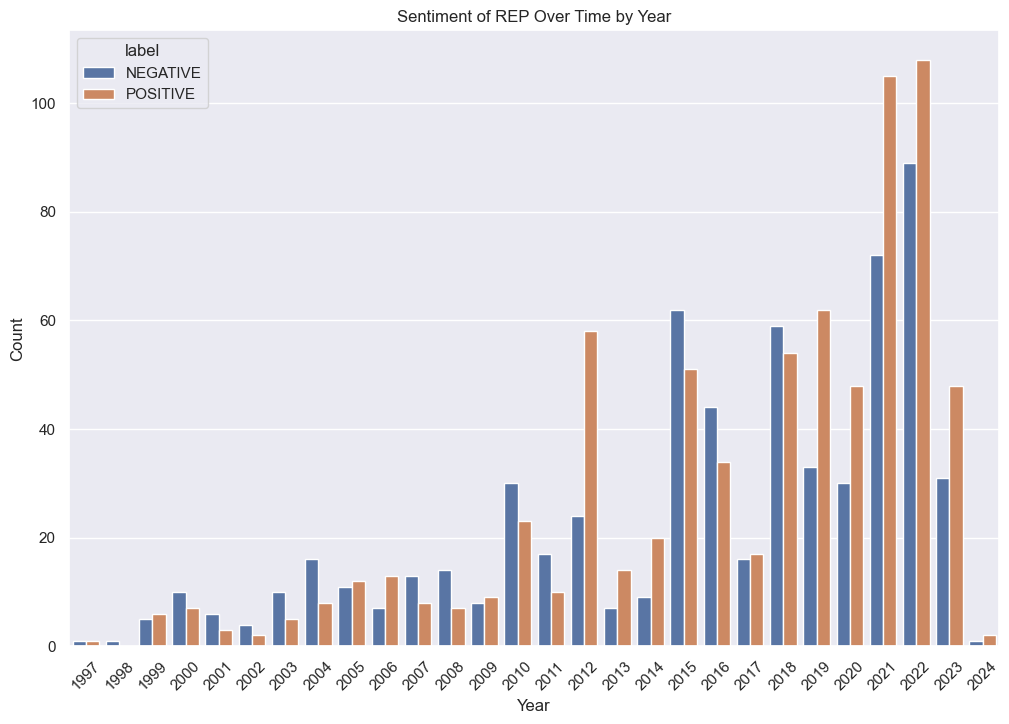

sen


/var/folders/6v/7554hy7n5zg4dv7nymqqshmm0000gn/T/ipykernel_32272/2676753447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_res['year'] = year


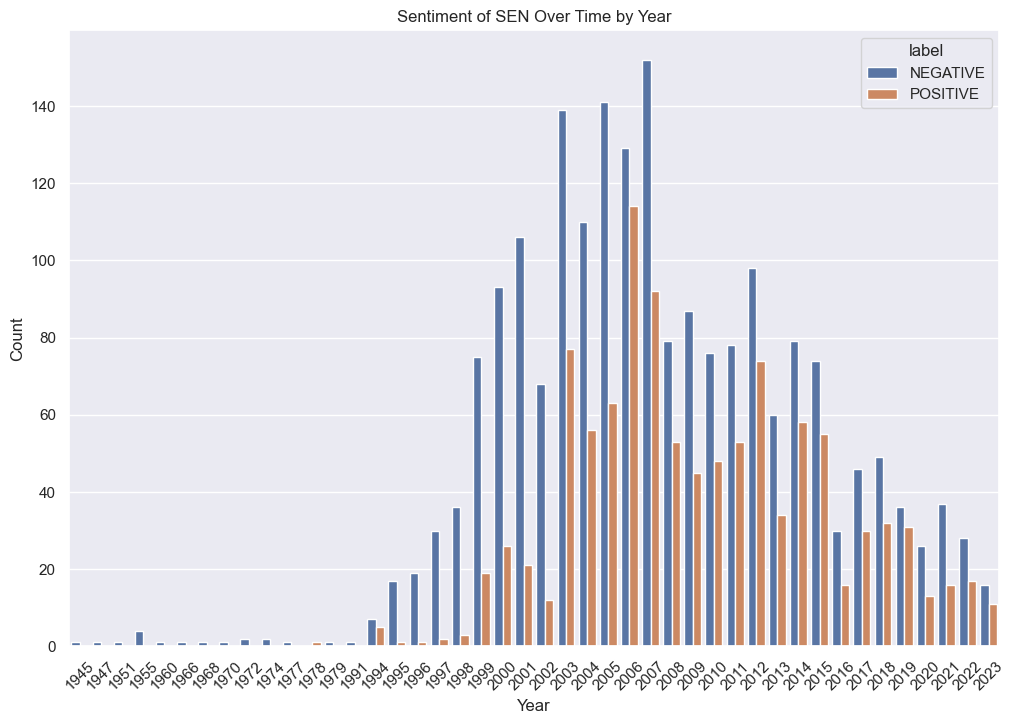

In [84]:
for sc in ['rep', 'sen']:
    print(sc)
    v_res = VoxGov_post_sentiment_res[VoxGov_post_sentiment_res['source_category'] == sc]
    # v_res['year'] = pd.to_datetime(v_res['date']).dt.year
    year = np.array([date.split('-')[0] for date in v_res['date']])
    v_res['year'] = year
    grouped_by_year = v_res.groupby(['year', 'label']).size().reset_index(name='count')
    grouped_by_year = grouped_by_year.sort_values(by='year')

    # Set the plot style
    sns.set_theme(style="darkgrid")

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Create a grouped barplot
    sns.barplot(x="year", y="count", hue="label", data=grouped_by_year)

    # Set the title and labels
    plt.title(f'Sentiment of {sc.upper()} Over Time by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

# mention WTO

In [152]:
VoxGov_post = []
all_cnt = 0

with open('VoxGov.jsonl', 'r') as file:
    for i, line in enumerate(file, start=1):
        data = json.loads(line.strip())
        all_cnt += 1
        try:
            if 'world trade organization' in data['text'].lower() or 'wto' in data['text'].lower():
                VoxGov_post.append([data['id'], data['source'], data['sourceType'], data['title'], data['text'], data['url'], data['date'], 
                                    data['organizations'], data['places']])
        except:
            continue

print(len(VoxGov_post))
print(all_cnt)

57888
72563


In [153]:
VoxGov_post = pd.DataFrame(VoxGov_post, columns=['id', 'source', 'sourceType', 'title', 'text', 'url', 'date', 'organizations', 'places'])
post_ids = VoxGov_post['id'].tolist()

In [154]:
VoxGov_sentiment_res = []

for file in glob('result/*'):
    with open(file, 'r') as f:
        print(file)
        data = json.load(f)
        for i, post_id in enumerate(data, start=1):
            if int(post_id) in post_ids:
                VoxGov_sentiment_res.append([int(post_id), data[post_id]['label'], 
                                             data[post_id]['positive_score'], 
                                             data[post_id]['negative_score']])

print(len(VoxGov_sentiment_res))

result/VoxGov_sentiment_1.json
result/VoxGov_sentiment_5.json
result/VoxGov_sentiment_4.json
result/VoxGov_sentiment_3.json
result/VoxGov_sentiment_2.json
57888


In [155]:
VoxGov_sentiment_res = pd.DataFrame(VoxGov_sentiment_res, columns=['id', 'label', 'positive_score', 'negative_score'])
VoxGov_post_sentiment_res = pd.merge(VoxGov_post, VoxGov_sentiment_res, on='id', how='left')

In [156]:
VoxGov_post_sentiment_res.to_csv('VoxGov_post_sentiment_res_wto.csv', index=False)

In [157]:
VoxGov_post_sentiment_res['label'].value_counts()

NEGATIVE    35114
POSITIVE    22774
Name: label, dtype: int64

In [162]:
VoxGov_post_sentiment_res['date'].isnull().sum()

0

In [49]:
for date in VoxGov_post_sentiment_res['date']:
    print(date.dt.year)

AttributeError: 'str' object has no attribute 'dt'

In [45]:
# Convert the 'date' column to year
VoxGov_post_sentiment_res['year'] = VoxGov_post_sentiment_res['date'].dt.year

# Group by year and label, then count occurrences
grouped_by_year = VoxGov_post_sentiment_res.groupby(['year', 'label']).size().reset_index(name='count')

# Sort by year
grouped_by_year = grouped_by_year.sort_values(by='year')

# Set the plot style
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a grouped barplot
sns.barplot(x="year", y="count", hue="label", data=grouped_by_year)

# Set the title and labels
plt.title('Sentiment Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [115]:
grouped = VoxGov_post_sentiment_res.groupby(['date', 'label'], as_index=False).size()

grouped = grouped.sort_values(by='date')

In [116]:
grouped

,date,label,size
0,1994-05-16,POSITIVE,1
1,1994-12-23,NEGATIVE,1
2,1995-01-04,NEGATIVE,1
3,1995-05-10,POSITIVE,1
4,1995-07-27,POSITIVE,1
...,...,...,...
344,2016-09-20,POSITIVE,1
345,2016-09-30,NEGATIVE,1
346,2016-10-18,NEGATIVE,1
347,2016-11-03,NEGATIVE,1


In [165]:
VoxGov_post = []
all_cnt = 0

with open('VoxGov.jsonl', 'r') as file:
    for i, line in enumerate(file, start=1):
        data = json.loads(line.strip())
        all_cnt += 1
        try:
            if 'world trade organization' not in data['text'].lower() or 'wto' not in data['text'].lower():
                print(data['id'])
                print(data['url'])
                print(data['text'], end='\n\n')
                # VoxGov_post.append([≈, data['source'], data['sourceType'], data['title'], data['text'], data['url'], data['date'], 
                #                     data['organizations'], data['places']])
                break
        except:
            continue

print(len(VoxGov_post))
print(all_cnt)

215456332
https://www.congress.gov/bill/117th-congress/senate-bill/732
BuyAmerican.gov Act of 2021   This bill directs the President and specified federal agencies to take steps to increase transparency and limit the use of waivers of Buy American laws. Generally, Buy American requires agencies to procure domestic goods.   The bill requires (1) the Department of Commerce to report periodically to Congress and the President on the implementation of, and compliance with, Buy American laws; (2) Commerce and the Office of the U.S. Trade Representative to assess the impacts of all U.S. free trade agreements and the World Trade Organization Agreement on Government Procurement on the operation of such laws; and (3) the General Services Administration (GSA) to establish a free, publicly available BuyAmerican.gov website. Public interest waivers from Buy American laws shall be construed to ensure the maximum utilization of goods, products, and materials produced in the United States.   The Pres

In [164]:
data.keys()

dict_keys(['id', 'title', 'date', 'source', 'sourceType', 'keywords', 'names', 'organizations', 'places', 'isCurrent', 'wordCount', 'contentType', 'url', 'text'])